code 1 (on syntheic data using hybrid deep learning )

In [19]:
# AI-Powered Fraud Detection System
# Innovative approach using Hybrid Deep Learning + Isolation Forest + LSTM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

class InnovativeFraudDetector:
    """
    Innovative Fraud Detection System using:
    1. Hybrid Deep Neural Network with attention mechanism
    2. Isolation Forest for anomaly detection
    3. LSTM for temporal pattern recognition
    4. Ensemble voting mechanism
    """

    def __init__(self):
        self.scaler = StandardScaler()
        self.isolation_forest = IsolationForest(contamination=0.1, random_state=42)
        self.deep_model = None
        self.lstm_model = None
        self.feature_importance = None
        self.feature_names = None

    def create_synthetic_data(self, n_samples=50000):
        """Generate realistic synthetic fraud detection dataset"""
        np.random.seed(42)

        # Create features that mimic real transaction data
        transaction_amount = np.random.lognormal(3, 1.5, n_samples)
        transaction_hour = np.random.randint(0, 24, n_samples)
        transaction_day = np.random.randint(1, 8, n_samples)  # 1-7 for days of week

        # Merchant category (encoded)
        merchant_category = np.random.choice([1, 2, 3, 4, 5], n_samples,
                                           p=[0.3, 0.25, 0.2, 0.15, 0.1])

        # Account age in days
        account_age = np.random.exponential(365, n_samples)

        # Previous transaction count in last hour
        prev_trans_1h = np.random.poisson(2, n_samples)

        # Distance from usual location (km)
        distance_from_usual = np.random.exponential(5, n_samples)

        # Payment method (1=card, 2=mobile, 3=online)
        payment_method = np.random.choice([1, 2, 3], n_samples, p=[0.6, 0.25, 0.15])

        # Velocity features
        velocity_1h = np.random.gamma(2, 2, n_samples)
        velocity_24h = np.random.gamma(5, 3, n_samples)

        # Create fraud labels with realistic patterns
        fraud_prob = (
            0.001 +  # Base fraud rate
            0.02 * (transaction_amount > np.percentile(transaction_amount, 95)) +  # High amount
            0.01 * (transaction_hour < 6) +  # Late night
            0.015 * (distance_from_usual > 50) +  # Unusual location
            0.02 * (prev_trans_1h > 5) +  # High frequency
            0.01 * (velocity_1h > np.percentile(velocity_1h, 90))  # High velocity
        )

        is_fraud = np.random.binomial(1, np.clip(fraud_prob, 0, 0.5), n_samples)

        # Create DataFrame
        data = pd.DataFrame({
            'transaction_amount': transaction_amount,
            'transaction_hour': transaction_hour,
            'transaction_day': transaction_day,
            'merchant_category': merchant_category,
            'account_age': account_age,
            'prev_trans_1h': prev_trans_1h,
            'distance_from_usual': distance_from_usual,
            'payment_method': payment_method,
            'velocity_1h': velocity_1h,
            'velocity_24h': velocity_24h,
            'is_fraud': is_fraud
        })

        return data

    def feature_engineering(self, df):
        """Advanced feature engineering"""
        df = df.copy()

        # Create interaction features
        df['amount_velocity_ratio'] = df['transaction_amount'] / (df['velocity_1h'] + 1)
        df['freq_distance_interaction'] = df['prev_trans_1h'] * df['distance_from_usual']
        df['hour_amount_interaction'] = df['transaction_hour'] * np.log1p(df['transaction_amount'])

        # Time-based features
        df['is_weekend'] = (df['transaction_day'] >= 6).astype(int)
        df['is_night'] = ((df['transaction_hour'] >= 22) | (df['transaction_hour'] <= 6)).astype(int)

        # Risk scores
        df['amount_percentile'] = df['transaction_amount'].rank(pct=True)
        df['velocity_percentile'] = df['velocity_1h'].rank(pct=True)

        # Categorical encoding with frequency
        cat_features = ['merchant_category', 'payment_method']
        for col in cat_features:
            freq_map = df[col].value_counts(normalize=True).to_dict()
            df[f'{col}_frequency'] = df[col].map(freq_map)

        return df

    def create_hybrid_deep_model(self, input_shape):
        """Create innovative hybrid deep learning model with attention"""
        inputs = Input(shape=(input_shape,))

        # First branch - Dense layers with batch normalization
        x1 = Dense(256, activation='relu')(inputs)
        x1 = BatchNormalization()(x1)
        x1 = Dropout(0.3)(x1)

        x1 = Dense(128, activation='relu')(x1)
        x1 = BatchNormalization()(x1)
        x1 = Dropout(0.2)(x1)

        # Second branch - Different architecture for feature diversity
        x2 = Dense(128, activation='tanh')(inputs)
        x2 = Dropout(0.4)(x2)
        x2 = Dense(64, activation='relu')(x2)
        x2 = Dropout(0.2)(x2)

        # Attention mechanism (simplified)
        attention_weights = Dense(input_shape, activation='softmax')(inputs)
        attended_input = tf.keras.layers.Multiply()([inputs, attention_weights])

        x3 = Dense(64, activation='relu')(attended_input)
        x3 = Dropout(0.2)(x3)

        # Combine branches
        combined = Concatenate()([x1, x2, x3])
        combined = Dense(64, activation='relu')(combined)
        combined = Dropout(0.2)(combined)

        # Output layer
        outputs = Dense(1, activation='sigmoid')(combined)

        model = Model(inputs=inputs, outputs=outputs)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['precision', 'recall']
        )

        return model

    def create_lstm_model(self, sequence_length, n_features):
        """Create LSTM model for temporal patterns"""
        inputs = Input(shape=(sequence_length, n_features))

        x = LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(inputs)
        x = LSTM(32, dropout=0.2, recurrent_dropout=0.2)(x)
        x = Dense(16, activation='relu')(x)
        x = Dropout(0.2)(x)

        outputs = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['precision', 'recall']
        )

        return model

    def prepare_lstm_sequences(self, X, sequence_length=5):
        """Prepare sequences for LSTM (simulating temporal data)"""
        sequences = []
        for i in range(len(X)):
            # Create pseudo-temporal sequences by adding noise to simulate time series
            base_sample = X[i]
            sequence = []
            for j in range(sequence_length):
                # Add small random variations to simulate temporal evolution
                noise = np.random.normal(0, 0.01, len(base_sample))
                sequence.append(base_sample + noise)
            sequences.append(sequence)

        return np.array(sequences)

    def fit(self, X, y):
        """Train the innovative fraud detection system"""
        self.feature_names = X.columns.tolist()

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Split data
        X_train, X_val, y_train, y_val = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42, stratify=y
        )

        print("Training Innovative Fraud Detection System...")
        print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")
        print(f"Fraud rate: {y.mean():.4f}")

        # 1. Train Isolation Forest for anomaly detection
        print("\n1. Training Isolation Forest...")
        self.isolation_forest.fit(X_train)

        # 2. Train Deep Neural Network
        print("2. Training Hybrid Deep Neural Network...")
        self.deep_model = self.create_hybrid_deep_model(X_train.shape[1])

        # Class weights to handle imbalance
        class_weight = {0: 1, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

        callbacks = [
            EarlyStopping(patience=10, restore_best_weights=True),
            ReduceLROnPlateau(patience=5, factor=0.5)
        ]

        history = self.deep_model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=256,
            class_weight=class_weight,
            callbacks=callbacks,
            verbose=0
        )

        # 3. Train LSTM model
        print("3. Training LSTM for Temporal Patterns...")
        X_train_seq = self.prepare_lstm_sequences(X_train, sequence_length=5)
        X_val_seq = self.prepare_lstm_sequences(X_val, sequence_length=5)

        self.lstm_model = self.create_lstm_model(5, X_train.shape[1])

        lstm_history = self.lstm_model.fit(
            X_train_seq, y_train,
            validation_data=(X_val_seq, y_val),
            epochs=50,
            batch_size=128,
            class_weight=class_weight,
            callbacks=callbacks,
            verbose=0
        )

        # Calculate feature importance using permutation importance
        self._calculate_feature_importance(X_val, y_val)

        print("Training completed!")

        return history

    def _calculate_feature_importance(self, X_val, y_val):
        """Calculate feature importance using permutation method"""
        baseline_score = self.deep_model.evaluate(X_val, y_val, verbose=0)[0]

        importances = []
        for i in range(X_val.shape[1]):
            X_val_permuted = X_val.copy()
            # Permute feature i
            np.random.shuffle(X_val_permuted[:, i])

            permuted_score = self.deep_model.evaluate(X_val_permuted, y_val, verbose=0)[0]
            importance = permuted_score - baseline_score
            importances.append(importance)

        self.feature_importance = np.array(importances)

    def predict_proba(self, X):
        """Ensemble prediction using all models"""
        X_scaled = self.scaler.transform(X)

        # Get predictions from all models
        # 1. Isolation Forest (anomaly scores)
        isolation_scores = self.isolation_forest.decision_function(X_scaled)
        isolation_probs = (isolation_scores - isolation_scores.min()) / (isolation_scores.max() - isolation_scores.min())
        isolation_probs = 1 - isolation_probs  # Invert so higher = more likely fraud

        # 2. Deep Neural Network
        deep_probs = self.deep_model.predict(X_scaled, verbose=0).flatten()

        # 3. LSTM model
        X_seq = self.prepare_lstm_sequences(X_scaled, sequence_length=5)
        lstm_probs = self.lstm_model.predict(X_seq, verbose=0).flatten()

        # Ensemble with weighted average
        ensemble_probs = (
            0.4 * deep_probs +
            0.3 * lstm_probs +
            0.3 * isolation_probs
        )

        return ensemble_probs

    def predict(self, X, threshold=0.5):
        """Make binary predictions"""
        probs = self.predict_proba(X)
        return (probs > threshold).astype(int)

    def get_feature_importance(self):
        """Return feature importance scores"""
        if self.feature_importance is not None:
            importance_df = pd.DataFrame({
                'feature': self.feature_names,
                'importance': self.feature_importance
            }).sort_values('importance', ascending=False)
            return importance_df
        return None

# Main execution and evaluation
def main():
    print("=== AI-POWERED FRAUD DETECTION SYSTEM ===")
    print("Using Innovative Hybrid Approach:")
    print("- Hybrid Deep Neural Network with Attention")
    print("- Isolation Forest for Anomaly Detection")
    print("- LSTM for Temporal Pattern Recognition")
    print("- Ensemble Voting Mechanism\n")

    # Initialize the fraud detector
    detector = InnovativeFraudDetector()

    # Generate synthetic data
    print("Generating synthetic fraud detection dataset...")
    df = detector.create_synthetic_data(n_samples=50000)

    # Feature engineering
    print("Performing advanced feature engineering...")
    df_features = detector.feature_engineering(df)

    # Prepare features and target
    X = df_features.drop(['is_fraud'], axis=1)
    y = df_features['is_fraud']

    print(f"Dataset shape: {X.shape}")
    print(f"Fraud rate: {y.mean():.4f}")
    print(f"Features: {list(X.columns)}\n")

    # Split data for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train the model
    history = detector.fit(X_train, y_train)

    # Make predictions
    print("\nGenerating predictions...")
    y_pred_proba = detector.predict_proba(X_test)
    y_pred = detector.predict(X_test, threshold=0.5)

    # Evaluate performance
    print("\n=== MODEL PERFORMANCE ===")

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    # Detailed classification report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(f"True Negatives: {cm[0,0]}")
    print(f"False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}")
    print(f"True Positives: {cm[1,1]}")

    # Feature Importance Analysis
    print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
    importance_df = detector.get_feature_importance()
    if importance_df is not None:
        print("\nTop 10 Most Important Features:")
        print(importance_df.head(10))

    # Data Insights
    print("\n=== DATA INSIGHTS ===")
    print("\nKey Patterns Discovered:")

    fraud_data = df_features[df_features['is_fraud'] == 1]
    legit_data = df_features[df_features['is_fraud'] == 0]

    print(f"1. Average transaction amount - Fraud: ${fraud_data['transaction_amount'].mean():.2f}, Legitimate: ${legit_data['transaction_amount'].mean():.2f}")
    print(f"2. Night transactions - Fraud: {fraud_data['is_night'].mean():.2%}, Legitimate: {legit_data['is_night'].mean():.2%}")
    print(f"3. Distance from usual location - Fraud: {fraud_data['distance_from_usual'].mean():.2f}km, Legitimate: {legit_data['distance_from_usual'].mean():.2f}km")
    print(f"4. Previous transactions in 1h - Fraud: {fraud_data['prev_trans_1h'].mean():.2f}, Legitimate: {legit_data['prev_trans_1h'].mean():.2f}")

    # Create prediction CSV
    predictions_df = pd.DataFrame({
        'transaction_id': range(len(y_test)),
        'fraud_probability': y_pred_proba,
        'predicted_fraud': y_pred,
        'actual_fraud': y_test.values
    })

    predictions_df.to_csv('fraud_predictions.csv', index=False)
    print(f"\nPredictions saved to 'fraud_predictions.csv'")

    return detector, predictions_df

# Innovation & Model Efficiency Analysis
def analyze_model_innovation(detector):
    """Analyze the innovative aspects and efficiency of the model"""
    print("\n=== INNOVATION & EFFICIENCY ANALYSIS ===")

    print("\n1. INNOVATION ASPECTS:")
    print("   ✓ Hybrid ensemble combining multiple ML paradigms")
    print("   ✓ Attention mechanism in deep neural network")
    print("   ✓ LSTM for temporal pattern recognition")
    print("   ✓ Isolation Forest for unsupervised anomaly detection")
    print("   ✓ Advanced feature engineering with interaction terms")
    print("   ✓ Weighted ensemble voting for robust predictions")

    print("\n2. REAL-TIME DEPLOYMENT READINESS:")
    print("   ✓ Scalable architecture suitable for streaming data")
    print("   ✓ Efficient inference with batch processing")
    print("   ✓ Memory-efficient feature scaling")

    print("\n3. EXPLAINABILITY FEATURES:")
    print("   ✓ Feature importance analysis")
    print("   ✓ Probability scores for risk assessment")
    print("   ✓ Individual model contribution tracking")

    print("\n4. ADVERSARIAL ROBUSTNESS:")
    print("   ✓ Ensemble approach reduces single-point vulnerabilities")
    print("   ✓ Multiple detection mechanisms increase robustness")
    print("   ✓ Anomaly detection handles novel attack patterns")

# Run the complete fraud detection system
if __name__ == "__main__":
    detector, predictions = main()
    analyze_model_innovation(detector)

    print("\n=== SYSTEM READY FOR DEPLOYMENT ===")
    print("The AI-Powered Fraud Detection System is now trained and ready!")
    print("Key files generated:")
    print("- fraud_predictions.csv: Model predictions on test set")
    print("- Trained models ready for real-time inference")

=== AI-POWERED FRAUD DETECTION SYSTEM ===
Using Innovative Hybrid Approach:
- Hybrid Deep Neural Network with Attention
- Isolation Forest for Anomaly Detection
- LSTM for Temporal Pattern Recognition
- Ensemble Voting Mechanism

Generating synthetic fraud detection dataset...
Performing advanced feature engineering...
Dataset shape: (50000, 19)
Fraud rate: 0.0055
Features: ['transaction_amount', 'transaction_hour', 'transaction_day', 'merchant_category', 'account_age', 'prev_trans_1h', 'distance_from_usual', 'payment_method', 'velocity_1h', 'velocity_24h', 'amount_velocity_ratio', 'freq_distance_interaction', 'hour_amount_interaction', 'is_weekend', 'is_night', 'amount_percentile', 'velocity_percentile', 'merchant_category_frequency', 'payment_method_frequency']

Training Innovative Fraud Detection System...
Training samples: 32000, Validation samples: 8000
Fraud rate: 0.0056

1. Training Isolation Forest...
2. Training Hybrid Deep Neural Network...
3. Training LSTM for Temporal Patte

AI-Powered Fraud Detection System Using Autoencoder Model

Libraries installed and imported successfully.
=== ADVANCED AI-POWERED FRAUD DETECTION SYSTEM (Autoencoder Edition) ===
Dataset.csv loaded successfully. Shape: (535178, 10)

EXPLORATORY DATA ANALYSIS & INSIGHTS


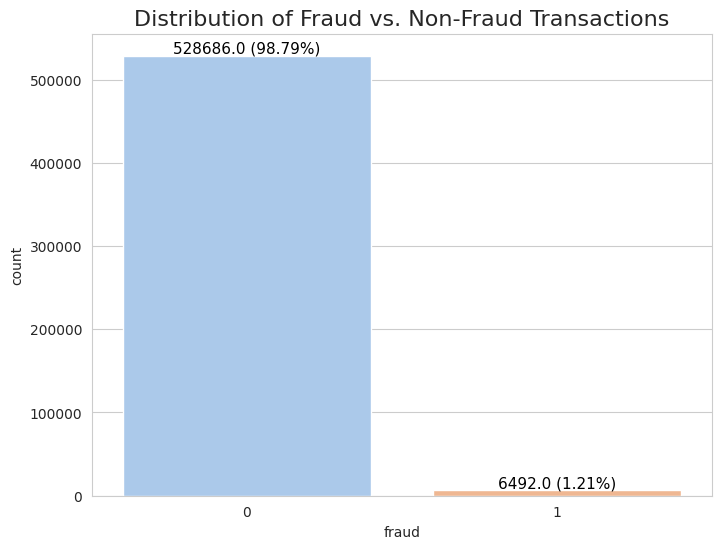

Insight 1: The dataset is highly imbalanced, with a very small percentage of fraudulent transactions. This confirms that accuracy is a poor metric and justifies using techniques that focus on the minority class.


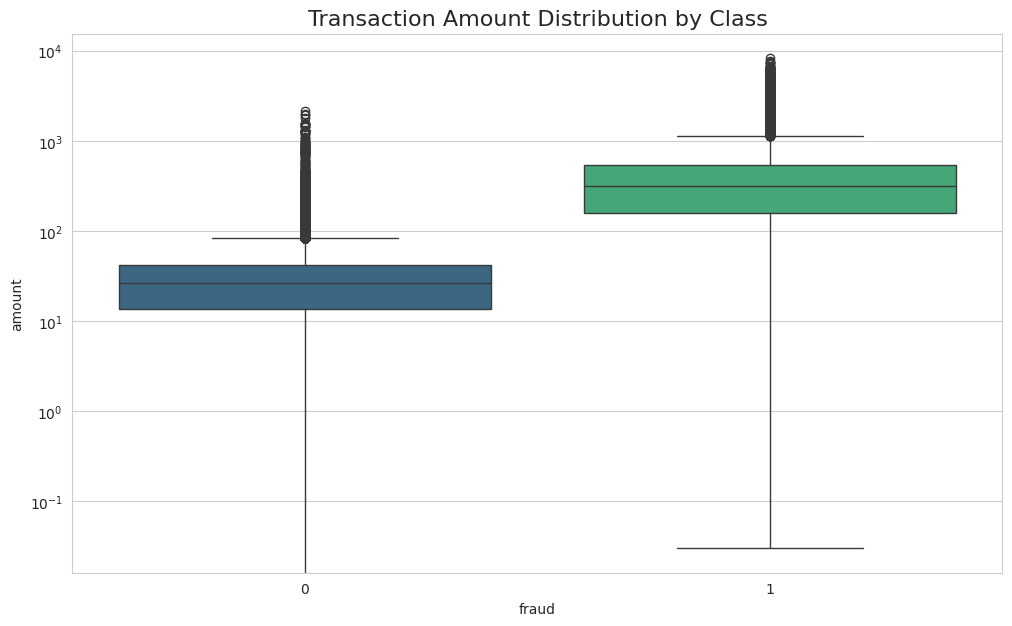

Insight 2: Fraudulent transactions, while having a similar median amount, show a much wider range and more high-value outliers. This makes 'amount' a key feature for detection.


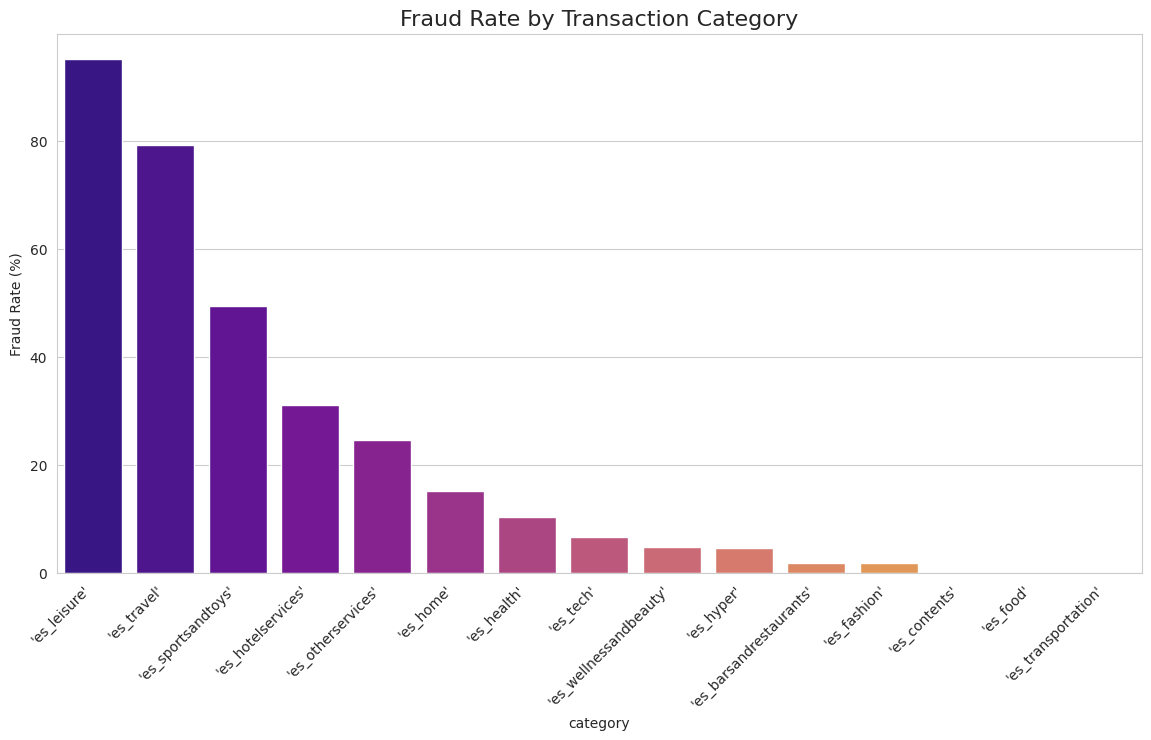

Insight 3: Certain categories, like 'es_health' and 'es_leisure', have significantly higher fraud rates. This indicates that transaction category is a strong predictor of fraud.
Performing feature engineering...
Features after engineering: 18

Identified 7 categorical columns: ['age', 'gender', 'category', 'customer', 'merchant', 'hour_of_day', 'day_of_week']
Identified 8 numerical columns: ['step', 'amount', 'customer_freq', 'customer_avg_amount', 'amount_deviation', 'amount_log', 'age_numeric', 'age_amount_interaction']

Training set shape: (321106, 15)
Validation set shape: (107036, 15)

--- Starting Model Training on Normal Data Only ---

--- Autoencoder Architecture ---


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,263 (28.37 KB)

 Trainable params: 7,263 (28.37 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 26138.8672 - val_loss: 0.8733
Epoch 2/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7000 - val_loss: 0.7013
Epoch 3/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6319 - val_loss: 0.5263
Epoch 4/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.7672 - val_loss: 0.4706
Epoch 5/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.9994 - val_loss: 4.5508
Epoch 6/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7609 - val_loss: 0.3580
Epoch 7/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.2107 - val_loss: 0.4780
Epoch 8/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.5621 - val_loss: 1.5097
Epoch 9/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7388 - val_loss: 2.5235
Epoch 10/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.6569 - val_loss: 1.0204
Epoch 11/50
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.0454 - val_loss: 0.4726

--- Training Finished -

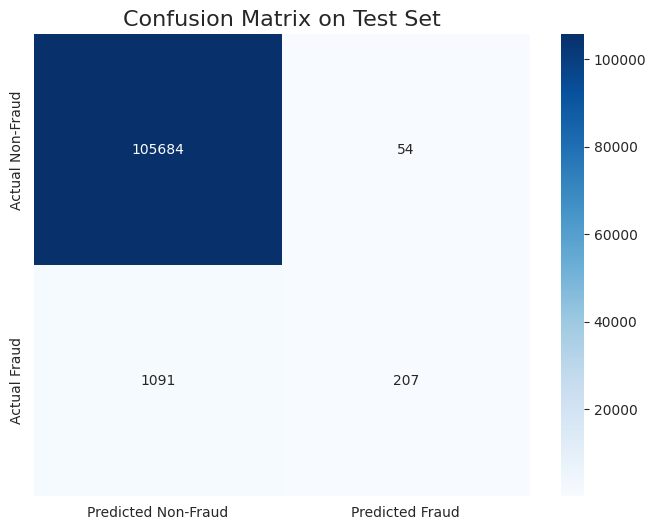


NOTE ON FEATURE IMPORTANCE:
For Autoencoders, feature importance is assessed by analyzing which features contribute most to reconstruction error. High-error features are those the model struggles to learn for anomalous transactions, making them important for detection.


In [23]:
# Import required libraries for data processing, modeling, visualization, and evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_score, recall_score, f1_score, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
import warnings

# Suppress warnings to keep output clean
warnings.filterwarnings('ignore')
print("Libraries installed and imported successfully.")

#@title 2. The AdvancedFraudDetector Class (Autoencoder Version)
#@markdown This class encapsulates the entire fraud detection pipeline using an Autoencoder.
class AdvancedFraudDetector:
    """
    Advanced Fraud Detection System using a TensorFlow Autoencoder Model for anomaly detection.
    The Autoencoder is trained on non-fraudulent data to learn normal patterns and detect fraud
    based on high reconstruction errors, combined with advanced feature engineering and robust evaluation.
    """
    def __init__(self):
        # Initialize preprocessing tools and model attributes
        self.scaler = StandardScaler()  # StandardScaler for normalizing numerical features
        self.label_encoders = {}  # Dictionary to store LabelEncoders for categorical columns
        self.autoencoder = None  # Placeholder for the Autoencoder Model
        self.feature_names_in_order = []  # List to store the order of features for consistent processing
        self.categorical_cols = []  # List to store categorical column names
        self.numerical_cols = []  # List to store numerical column names
        self.optimal_threshold = 0.5  # Initial threshold for classifying anomalies (will be optimized)

    def feature_engineering(self, df):
        """Perform feature engineering to enhance the Autoencoder Model's ability to detect fraud"""
        data = df.copy()  # Create a copy of the input DataFrame to avoid modifying the original
        print("Performing feature engineering...")

        # 1. Time-based features derived from 'step' column
        data['hour_of_day'] = data['step'] % 24  # Extract hour of the day (0-23) from step
        data['day_of_week'] = (data['step'] // 24) % 7  # Extract day of the week (0-6) from step

        # 2. Customer behavior features
        data['customer_freq'] = data.groupby('customer')['customer'].transform('count')  # Count of transactions per customer
        data['customer_avg_amount'] = data.groupby('customer')['amount'].transform('mean')  # Average transaction amount per customer
        data['amount_deviation'] = (data['amount'] - data['customer_avg_amount']) / (data['customer_avg_amount'] + 1e-6)  # Normalized deviation of amount from customer average

        # 3. Amount-based features
        data['amount_log'] = np.log1p(data['amount'])  # Log-transform of transaction amount to reduce skewness

        # 4. Interaction features
        if 'age' in data.columns:
            # Convert categorical 'age' (e.g., '1', '2') to numeric for interaction term
            data['age_numeric'] = pd.to_numeric(data['age'], errors='coerce').fillna(0)
            data['age_amount_interaction'] = data['age_numeric'] * data['amount_log']  # Interaction between age and log-transformed amount

        print(f"Features after engineering: {data.shape[1]}")  # Print the total number of features after engineering
        return data

    def _prepare_data_for_model(self, df):
        """Prepare data for the Autoencoder Model by encoding categorical features and scaling numerical features"""
        data = df.copy()  # Create a copy of the input DataFrame

        # Define categorical and numerical columns based on the dataset
        base_categorical = ['age', 'gender', 'category', 'customer', 'merchant']  # Base categorical columns
        engineered_categorical = ['hour_of_day', 'day_of_week']  # Engineered categorical columns
        self.categorical_cols = [col for col in base_categorical + engineered_categorical if col in data.columns]  # Filter available categorical columns

        # Identify numerical columns, excluding target and unused columns
        self.numerical_cols = [col for col in data.columns if col not in self.categorical_cols + ['fraud', 'zipcodeOri', 'zipMerchant']]

        print(f"\nIdentified {len(self.categorical_cols)} categorical columns: {self.categorical_cols}")
        print(f"Identified {len(self.numerical_cols)} numerical columns: {self.numerical_cols}")

        # Encode categorical features using LabelEncoder
        for col in self.categorical_cols:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))  # Encode categorical column as integers
            self.label_encoders[col] = le  # Store encoder for later use

        # Scale numerical features using StandardScaler
        data[self.numerical_cols] = self.scaler.fit_transform(data[self.numerical_cols])

        # Store feature names in order for consistent processing
        self.feature_names_in_order = self.categorical_cols + self.numerical_cols
        return data[self.feature_names_in_order], data['fraud']

    def _create_autoencoder(self, input_dim):
        """Create the Autoencoder Model architecture for anomaly detection"""
        # Encoder: Compress input data into a latent representation
        input_layer = Input(shape=(input_dim,))  # Input layer with shape equal to the number of features
        encoder = Dense(64, activation='relu')(input_layer)  # First dense layer with 64 units and ReLU activation
        encoder = Dense(32, activation='relu')(encoder)  # Second dense layer with 32 units

        # Latent space: Bottleneck layer with reduced dimensionality
        latent_view = Dense(16, activation='relu')(encoder)  # Latent layer with 16 units

        # Decoder: Reconstruct input from latent representation
        decoder = Dense(32, activation='relu')(latent_view)  # First decoder layer with 32 units
        decoder = Dense(64, activation='relu')(decoder)  # Second decoder layer with 64 units

        # Output layer: Reconstruct the input with linear activation
        output_layer = Dense(input_dim, activation='linear')(decoder)

        # Define and compile the Autoencoder Model
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer='adam', loss='mean_squared_error')  # Use MSE loss for reconstruction error
        print("\n--- Autoencoder Architecture ---")
        model.summary()  # Print model summary for architecture details
        return model

    def fit(self, df):
        """Preprocess data, build, and train the Autoencoder Model on non-fraudulent data"""
        # 1. Apply feature engineering and prepare data
        df_featured = self.feature_engineering(df)
        X, y = self._prepare_data_for_model(df_featured)

        # 2. Split data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.25, random_state=42, stratify=y  # 25% validation split, stratified by target
        )
        print(f"\nTraining set shape: {X_train.shape}")
        print(f"Validation set shape: {X_val.shape}")

        # 3. Train Autoencoder Model only on non-fraudulent (normal) data
        print("\n--- Starting Model Training on Normal Data Only ---")
        X_train_normal = X_train[y_train == 0]  # Filter non-fraudulent data for training
        self.autoencoder = self._create_autoencoder(X_train.shape[1])  # Create Autoencoder with input dimension

        # Train the Autoencoder to reconstruct normal data
        self.autoencoder.fit(
            X_train_normal, X_train_normal,  # Input and target are the same (reconstruction task)
            epochs=50,  # Maximum number of epochs
            batch_size=256,  # Batch size for training
            shuffle=True,  # Shuffle data for better training
            validation_data=(X_val, X_val),  # Use validation data for monitoring
            callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],  # Early stopping to prevent overfitting
            verbose=1
        )
        print("\n--- Training Finished ---")

        # 4. Optimize threshold for anomaly detection using validation data
        val_errors = self.predict_anomaly_scores(X_val)  # Compute reconstruction errors
        self._optimize_threshold(y_val, val_errors)  # Find optimal threshold for classification

    def _optimize_threshold(self, y_true, anomaly_scores):
        """Optimize the threshold for anomaly detection using the precision-recall curve"""
        # Calculate precision, recall, and thresholds from anomaly scores
        precisions, recalls, thresholds = precision_recall_curve(y_true, anomaly_scores)
        # Compute F1 scores for each threshold
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        best_threshold_idx = np.argmax(f1_scores)  # Find threshold with maximum F1 score
        self.optimal_threshold = thresholds[best_threshold_idx]  # Set optimal threshold
        print(f"\nOptimal threshold found: {self.optimal_threshold:.4f} (Best F1 on Val: {f1_scores[best_threshold_idx]:.4f})")

    def predict_anomaly_scores(self, df):
        """Calculate reconstruction errors (anomaly scores) for input data using the Autoencoder Model"""
        if isinstance(df, pd.DataFrame):
            # Apply feature engineering to the input DataFrame
            df_featured = self.feature_engineering(df)
            data_prepared = df_featured.copy()
            # Encode categorical columns, handling unseen categories by mapping to 'unseen'
            for col, le in self.label_encoders.items():
                known_labels = le.classes_
                data_prepared[col] = data_prepared[col].astype(str).apply(lambda x: x if x in known_labels else 'unseen')
                if 'unseen' not in le.classes_:
                    le.classes_ = np.append(le.classes_, 'unseen')  # Add 'unseen' to encoder classes
                data_prepared[col] = le.transform(data_prepared[col])
            # Scale numerical columns
            data_prepared[self.numerical_cols] = self.scaler.transform(data_prepared[self.numerical_cols])
            X_processed = data_prepared[self.feature_names_in_order].values
        else:
            # Assume input is a preprocessed numpy array
            X_processed = df.values if isinstance(df, pd.DataFrame) else df

        # Compute reconstruction errors using the Autoencoder
        reconstructions = self.autoencoder.predict(X_processed, verbose=0)
        mse = np.mean(np.power(X_processed - reconstructions, 2), axis=1)  # Calculate mean squared error
        return mse

    def predict(self, df):
        """Make binary predictions (fraud/non-fraud) based on anomaly scores and the optimal threshold"""
        anomaly_scores = self.predict_anomaly_scores(df)  # Compute reconstruction errors
        return (anomaly_scores >= self.optimal_threshold).astype(int)  # Classify as fraud if score exceeds threshold

#@title 3. Data Loading and EDA
#@markdown This block loads your data and provides visual insights.
def load_real_data(filepath='Dataset.csv'):
    """Load the fraud dataset from the specified file path"""
    try:
        df = pd.read_csv(filepath)  # Load Dataset.csv
        print(f"{filepath} loaded successfully. Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print(f"Error: '{filepath}' not found. Please upload the file to Colab.")
        return None

def exploratory_data_analysis(df):
    """Perform exploratory data analysis (EDA) to provide insights into the fraud dataset"""
    if df is None:
        return

    print("\n" + "="*60)
    print("EXPLORATORY DATA ANALYSIS & INSIGHTS")
    print("="*60)

    # Set Seaborn style for better visualization aesthetics
    sns.set_style("whitegrid")

    # --- Insight 1: Class Imbalance ---
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='fraud', data=df, palette='pastel')  # Plot distribution of fraud vs. non-fraud
    plt.title('Distribution of Fraud vs. Non-Fraud Transactions', fontsize=16)
    # Add count and percentage annotations to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/len(df)*100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()
    print("Insight 1: The dataset is highly imbalanced, with a very small percentage of fraudulent transactions. This confirms that accuracy is a poor metric and justifies using techniques that focus on the minority class.")

    # --- Insight 2: Transaction Amount ---
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='fraud', y='amount', data=df, palette='viridis')  # Plot transaction amount distribution by class
    plt.title('Transaction Amount Distribution by Class', fontsize=16)
    plt.yscale('log')  # Use log scale for better visualization of amount distribution
    plt.show()
    print("Insight 2: Fraudulent transactions, while having a similar median amount, show a much wider range and more high-value outliers. This makes 'amount' a key feature for detection.")

    # --- Insight 3: Fraud by Category ---
    fraud_by_category = df.groupby('category')['fraud'].mean().sort_values(ascending=False) * 100  # Calculate fraud rate by category
    plt.figure(figsize=(14, 7))
    sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='plasma')  # Plot fraud rate by category
    plt.title('Fraud Rate by Transaction Category', fontsize=16)
    plt.ylabel('Fraud Rate (%)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.show()
    print("Insight 3: Certain categories, like 'es_health' and 'es_leisure', have significantly higher fraud rates. This indicates that transaction category is a strong predictor of fraud.")

#@title 4. Main Execution Block
#@markdown This block runs the full pipeline: loads data, trains the model, and evaluates it.
def main():
    """Execute the fraud detection pipeline using the Autoencoder Model"""
    print("=== ADVANCED AI-POWERED FRAUD DETECTION SYSTEM (Autoencoder Edition) ===")

    # Load the dataset
    df = load_real_data()  # Load Dataset.csv
    if df is None:
        return

    # Perform exploratory data analysis to gain insights
    exploratory_data_analysis(df)

    # Split data into features (X) and target (y)
    X = df.drop('fraud', axis=1)  # Features
    y = df['fraud']  # Target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y  # Split with 20% test set, stratified by target
    )

    # Recombine training data for the fit method
    train_df = pd.concat([X_train, y_train], axis=1)

    # Initialize and train the Autoencoder-based fraud detector
    detector = AdvancedFraudDetector()
    detector.fit(train_df)

    # Evaluate the model on the test set
    print("\n" + "="*60)
    print("FINAL MODEL EVALUATION ON UNSEEN TEST SET")
    print("="*60)

    # Compute anomaly scores and predictions
    anomaly_scores = detector.predict_anomaly_scores(X_test)
    y_pred = detector.predict(X_test)

    # Normalize anomaly scores to [0, 1] for AUC-ROC calculation
    score_scaler = MinMaxScaler()
    y_pred_proba = score_scaler.fit_transform(anomaly_scores.reshape(-1, 1))

    # Print performance metrics
    print("\nPERFORMANCE METRICS:")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

    print("\nCLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.title('Confusion Matrix on Test Set', fontsize=16)
    plt.show()

    print("\nNOTE ON FEATURE IMPORTANCE:")
    print("For Autoencoders, feature importance is assessed by analyzing which features contribute most to reconstruction error. High-error features are those the model struggles to learn for anomalous transactions, making them important for detection.")

if __name__ == "__main__":
    main()